In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from extract_features import get_csv

In [2]:
csv_name = "yogawithdrecreated_at869603447.csv"
test_csv = pd.read_csv("~/Desktop/tweet/positive/csv/yogawithdrecreated_at869603447.csv")
test_csv.loc[1:2]

,Unnamed: 0,created_at,emoji_count,emoticon_count,favorite_count,followers_count,friends_count,lang,listed_count,mention_count,retweet_count,text,total_favourites_count
1,1,Wed Oct 28 18:00:05 +0000 2015,0,1,0,204,193,en,44,0,0,yoga is the teacher of yoga yoga is to be unde...,81
2,2,Wed Oct 28 06:35:05 +0000 2015,0,0,0,204,193,en,44,0,0,the whole techniqu of yoga it practic and rest...,81


In [3]:
test_csv.loc[:,['created_at','text']]


,created_at,text
0,Thu Oct 29 15:54:12 +0000 2015,at 14 i was diagnos with attent deficit disord...
1,Wed Oct 28 18:00:05 +0000 2015,yoga is the teacher of yoga yoga is to be unde...
2,Wed Oct 28 06:35:05 +0000 2015,the whole techniqu of yoga it practic and rest...
3,Mon Oct 26 13:55:01 +0000 2015,come get your yoga on with at_us this morn at ...
4,Sun Oct 25 13:27:29 +0000 2015,i sure will miss practic acrobat and sundayfun...
5,Sat Oct 24 13:12:42 +0000 2015,fun way to load onto your base at_us a victori...
6,Fri Oct 23 16:25:56 +0000 2015,i my student at_us green tree yoga medit found...
7,Fri Oct 23 12:49:12 +0000 2015,flashbackfriday fbf to a coupl week ago at con...
8,Fri Oct 23 03:58:31 +0000 2015,anyon who work with me know that be upright is...
9,Thu Oct 22 04:51:45 +0000 2015,hummingbird with at_us and lizzytomb the origi...


In [4]:
import time
import datetime
time_struct2 = time.strptime("Wed Sep 30 13:20:01 +0000 2015","%a %b %d %H:%M:%S +0000 %Y")
time_struct2

time.struct_time(tm_year=2015, tm_mon=9, tm_mday=30, tm_hour=13, tm_min=20, tm_sec=1, tm_wday=2, tm_yday=273, tm_isdst=-1)

[15.]
[15. 18.]
[15. 18.  6.]
[15. 18.  6. 13.]
[15. 18.  6. 13. 13.]
[15. 18.  6. 13. 13. 13.]
[15. 18.  6. 13. 13. 13. 16.]
[15. 18.  6. 13. 13. 13. 16. 12.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3. 18.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3. 18. 21.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3. 18. 21. 17.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3. 18. 21. 17.
 12.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3. 18. 21. 17.
 12. 20.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3. 18. 21. 17.
 12. 20. 15.]
[15. 18.  6. 13. 13. 13. 16. 12

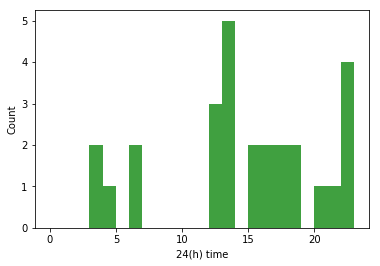

In [5]:
time_list = np.array([])
for time_row in test_csv.created_at:
   
    time_struct = time.strptime(time_row,"%a %b %d %H:%M:%S +0000 %Y")
    
    HMS = int(time.strftime("%H",time_struct))
    
    time_list=np.append(time_list,HMS)
    print(time_list)
plt.hist(time_list,bins=np.arange(0,24,1),facecolor="g",alpha =0.75)
plt.xlabel("24(h) time")
plt.ylabel("Count")
plt.show()

In [6]:
positive_path =get_csv("/Users/charles_tong/Desktop/tweet/positive/csv")
negative_path =get_csv("/Users/charles_tong/Desktop/tweet/negative/csv")
positive_time_toal = 0
positive_time= 0
negative_time_total = 0
negative_time=0
for csv_path in positive_path:
    csv = pd.read_csv(csv_path)

    for time_row in csv.created_at:
        time_struct = time.strptime(time_row,"%a %b %d %H:%M:%S +0000 %Y")
        HMS = int(time.strftime("%H%M%S",time_struct))
        positive_time_toal+=1
        if HMS <=60000 or HMS >= 230000:
            positive_time+=1
            
        ##positive_time=np.append(positive_time,HMS)
    print("P",end="")

for csv_path in negative_path:
    csv = pd.read_csv(csv_path)

    for time_row in csv.created_at:
        time_struct = time.strptime(time_row,"%a %b %d %H:%M:%S +0000 %Y")
        HMS = int(time.strftime("%H%M%S",time_struct))
        negative_time_total+=1
        if HMS <=60000 or HMS >= 230000:
            negative_time+=1
    
        
    print("N",end="")
print("positive time= %d, positive total= %d"%(positive_time,positive_time_toal))
print("negative time= %d, negative total= %d"%(negative_time,negative_time_total))
print("Positive time percentage: %f "%(positive_time*100/positive_time_toal))
print("Negative time percentage: %f "%(negative_time*100/negative_time_total))

'''
plt.hist(time_list,bins=np.arange(0,24,1),facecolor="red",alpha =0.75)
plt.title("Depression user post time distribution")
plt.xlabel("24(h) time")
plt.ylabel("Count")
plt.show()
'''

PPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP

'\nplt.hist(time_list,bins=np.arange(0,24,1),facecolor="red",alpha =0.75)\nplt.title("Depression user post time distribution")\nplt.xlabel("24(h) time")\nplt.ylabel("Count")\nplt.show()\n'

In [7]:
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.metrics import classification_report

posData_path = "/Users/charles_tong/Desktop/Depression-detection/positive_model.csv"
negData_path = "/Users/charles_tong/Desktop/Depression-detection/negative_model.csv"

pos_csv = pd.read_csv(posData_path)
neg_csv = pd.read_csv(negData_path)
##add feature
'''
pos_csv=pos_csv.assign(total_emoji=pos_csv.emojis*pos_csv.total_post,
                       total_emoticon = pos_csv.emoticons*pos_csv.total_post,
                       total_emo = (pos_csv.emojis+pos_csv.emoticons)*pos_csv.total_post,
                       total_favorite= pos_csv.favorites*pos_csv.total_post,
                       total_mention = pos_csv.mention_count*pos_csv.total_post,
                       total_neg = pos_csv.neg_words*pos_csv.total_post,
                       total_pos = pos_csv.pos_words*pos_csv.total_post,
                       total_time = pos_csv.nightTime_count*pos_csv.total_post,
                       total_retweet = pos_csv.retweet_count*pos_csv.total_post)

neg_csv=neg_csv.assign(total_emoji=neg_csv.emojis*neg_csv.total_post,
                       total_emoticon = neg_csv.emoticons*neg_csv.total_post,
                       total_emo = (neg_csv.emojis+neg_csv.emoticons)*neg_csv.total_post,
                       total_favorite= neg_csv.favorites*neg_csv.total_post,
                       total_mention = neg_csv.mention_count*neg_csv.total_post,
                       total_neg = neg_csv.neg_words*neg_csv.total_post,
                       total_pos = neg_csv.pos_words*neg_csv.total_post,
                       total_time = neg_csv.nightTime_count*neg_csv.total_post,
                       total_retweet = neg_csv.retweet_count*neg_csv.total_post)
print(pos_csv)
print(neg_csv)
'''
print(neg_csv.loc[0,:])

Unnamed: 0                   0.000000
emojis                       0.841176
emoticons                    0.370588
favorites                   41.505882
followers                 7417.000000
friends_count              512.000000
listed_count                12.000000
mention_count                0.911765
neg_words                    3.082353
nightTime_count              0.282353
pos_words                    3.541176
retweet_count              683.288235
total_favourites_count    5566.000000
total_post                 170.000000
Name: 0, dtype: float64


In [8]:
'''Classifier: SVM '''
pos_model = np.array(pos_csv.iloc[:,1:14])
neg_model = np.array(neg_csv.iloc[:,1:14])
dataset= np.concatenate((pos_model,neg_model))
target = np.append(np.ones(len(pos_model)),np.zeros(len(neg_model)))
X_train, X_test, y_train, y_test = train_test_split(dataset,target,train_size=0.6)
svc = svm.SVC(kernel='rbf',C=0.9,gamma=0.125,probability=True,decision_function_shape='ovo')
svc.fit(X_train,y_train)

print("trainset accuracy: %f"%svc.score(X_train,y_train))
print ("testset accuracy: %f"%svc.score(X_test,y_test))
y_pred1 = svc.predict(X_test)

print (classification_report(y_true=y_test,y_pred=y_pred1))

/Users/charles_tong/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


trainset accuracy: 1.000000
testset accuracy: 0.673098
             precision    recall  f1-score   support

        0.0       0.67      1.00      0.80      1842
        1.0       1.00      0.01      0.02       905

avg / total       0.78      0.67      0.54      2747



             precision    recall  f1-score   support

        0.0       0.84      0.48      0.61      1842
        1.0       0.43      0.81      0.56       905

avg / total       0.70      0.59      0.59      2747



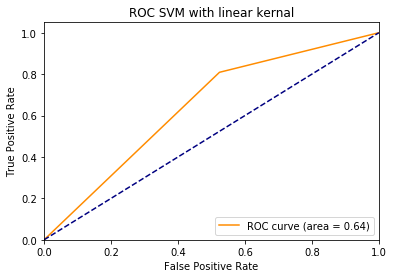

In [30]:
'''LinearSVC'''
from sklearn.svm import LinearSVC
Classifier_svm_lin = LinearSVC()
Classifier_svm_lin.fit(X_train,y_train)
lin_pred = Classifier_svm_lin.predict(X_test)

print (classification_report(y_true=y_test,y_pred=lin_pred))

##ROC
fpr, tpr,thresholds = roc_curve(y_test,lin_pred, pos_label=1)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy' ,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC SVM with linear kernal')
plt.legend(loc="lower right")
plt.show()

             precision    recall  f1-score   support

        0.0       0.82      0.79      0.80      1842
        1.0       0.60      0.64      0.62       905

avg / total       0.74      0.74      0.74      2747



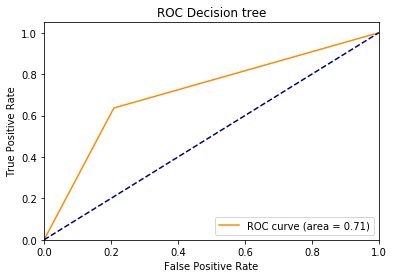

In [17]:
'''Classifier : Decision tree'''
from sklearn import tree
classifier_tree = tree.DecisionTreeClassifier()
classifier_tree.fit(X_train,y_train)
tree_pred=classifier_tree.predict(X_test)
print (classification_report(y_true=y_test,y_pred=tree_pred))
##ROC
fpr, tpr,thresholds = roc_curve(y_test,tree_pred, pos_label=1)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy' ,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Decision tree')
plt.legend(loc="lower right")
plt.show()


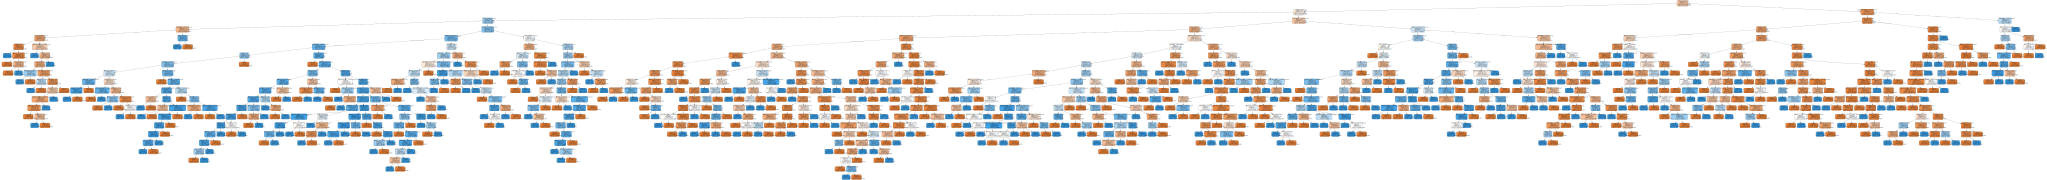

In [12]:
## Decision tree Graph
import graphviz
dot_data = tree.export_graphviz(classifier_tree, out_file=None, 
                         feature_names=np.array(pos_csv.columns[1:14]),  
                         class_names=np.array(['depression','normal']),  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

             precision    recall  f1-score   support

        0.0       0.68      0.96      0.80      1842
        1.0       0.57      0.10      0.17       905

avg / total       0.65      0.68      0.59      2747



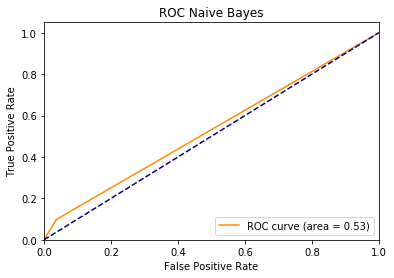

In [31]:
##Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train,y_train)
NB_pred=classifier_NB.predict(X_test)

print (classification_report(y_true=y_test,y_pred=NB_pred))
##ROC
fpr, tpr,thresholds = roc_curve(y_test,NB_pred, pos_label=1)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy' ,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Naive Bayes')
plt.legend(loc="lower right")
plt.show()

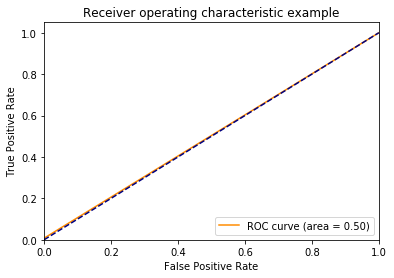

In [32]:
##RBF kernel
from sklearn.metrics import roc_curve,auc
y_score= svc.predict(X_test)
fpr, tpr,thresholds = roc_curve(y_test,y_score, pos_label=1)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy' ,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
gamma = [0.125, 0.25, 0.5, 1]
C = np.arange(0.1,10,0.1)
y1=[]
y2=[]
y3=[]
y4=[]
for C_coe in C:
    svc1 = svm.SVC(kernel='rbf',C=C_coe,gamma=gamma[0])
    svc2 = svm.SVC(kernel='rbf',C=C_coe,gamma=gamma[1])
    svc3 = svm.SVC(kernel='rbf',C=C_coe,gamma=gamma[2])
    svc4 = svm.SVC(kernel='rbf',C=C_coe,gamma=gamma[3])
    svc1.fit(X_train,y_train)
    svc2.fit(X_train,y_train)
    svc3.fit(X_train,y_train)
    svc4.fit(X_train,y_train)
    y1.append(svc1.score(X_test,y_test))
    y2.append(svc2.score(X_test,y_test))
    y3.append(svc3.score(X_test,y_test))
    y4.append(svc4.score(X_test,y_test))
    print("...",end="")
C=list(C)  
plt.plot(C,y1,label='Gamma= 0.125')
plt.plot(C,y2,label='Gamma= 0.25')
plt.plot(C,y3,label='Gamma= 0.5')
plt.plot(C,y4,label='Gamma= 1')
plt.xlabel("C loss value")
plt.ylabel("Accuracy")
plt.title("SVM with RBF Accurany Figure")
plt.legend()
plt.show()


In [ ]:

Accuracy_list = []
for f_num in range(2,15):
    pos_select = np.array(pos_csv.iloc[:,1:f_num])
    neg_select = np.array(neg_csv.iloc[:,1:f_num])
    
    feature_select = np.concatenate((pos_select,neg_select))
    X_train1, X_test1, y_train1, y_test1 = train_test_split(feature_select,target,train_size=0.6,random_state=1)
    svc_select = svm.SVC(kernel='rbf',C=0.9,gamma=0.125)
    svc_select.fit(X_train1,y_train1)
    Accuracy_list.append(svc_select.score(X_test1,y_test1))
plt.plot(list(range(1,14)),Accuracy_list)
plt.xlabel("Feature Number")
plt.ylabel("Accuracy")
plt.title("Different feature number with Accurany Figure")
plt.show()



In [ ]:
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 2, 4], 'gamma':[0.125, 0.25, 0.5 ,1, 2, 4]}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters, n_jobs=-1)
print(type(iris.data))
clf.fit(iris.data, iris.target)
cv_result = pd.DataFrame.from_dict(clf.cv_results_)
    
print('The parameters of the best model are: ')
print(clf.best_params_)

y_pred = clf.predict(iris.data)
print(type(iris.data))
print(iris.data)
print(classification_report(y_true=iris.target, y_pred=y_pred))